# AnoDDPM for Abdominal MRI

This notebook is based on the AnnoDDPM method proposed in [this](https://openaccess.thecvf.com/content/CVPR2022W/NTIRE/papers/Wyatt_AnoDDPM_Anomaly_Detection_With_Denoising_Diffusion_Probabilistic_Models_Using_Simplex_CVPRW_2022_paper.pdf) paper. The code used is a slightly modified version of the on their [Github](https://github.com/Julian-Wyatt/AnoDDPM).

(optional) The files for the project can be downloaded [here](https://github.com/skyfinder3/annoDDPM.git)


## Overview over the code
File structure
```
AnnoDDPM
- custom
| - requirements.txt            # Not actually used but usefull if you want to know which packages to install
- DATASETS                      # (see below)
- diffusion-analyzing-images    # Output of the analyzing script
- diffusion-training-images     # Output created during training to show progress
- diffusion-videos              # Output created during training to show progress
- final-outputs                 # Final Figure to show after image_generation
- model                         # contains all the models. 1 per run with args[x].json . If training was interrupted also checkpoints
- test_args                     # All the configurations for the runs (see below for more)
- .gitignore
- analyze_image.py              # Script to analyze image(s) in the analyze dataset
- dataset.py                    # code to load and prepare teh dataset
- detection.py                  # Code to create AUROC etc.
- diffusion_training.py         # Main script to run for training
- GaussianDiffusion.py          # Class to handly the Diffusion process
- generate_images.py            # Script to compute final figure form the paper (not actively used)
- graphs.py                     
- helpers.py                    
- simplex.py                    # Script for simplex noise
- UNet.py                       # UNet Codes

```



## Setup

- change working directory to folder AnnoDDPM

In [ ]:
# in google drive
!pwd
%cd /content/drive/MyDrive/AnnoDDPM/

/content/drive/MyDrive/AnnoDDPM


## Dataset preparation

The important folders are Train, Test and Analyze
The structure should look like this:

```
AnnoDDPM
- Train
| - [Casename]
| | - [Casename]_2000002_1.nii.gz # This compressed archive contains all the Images form one Patient
| | - [Casename]_2000002_1.json        # !Not used! contains additional information about the compression  
| | - [Casename].npy                   # (only after first run) This file containes the image converted to numpy array / cache
| - ---                           # More cases
- Test
| | - 002-1_2000002_1.nii.gz # This compressed archive contains all the Images form one Patient
| | - 002-1_2000002_1.json        # !Not used! contains additional information about the compression  
| | - 002-1.npy                   # (only after first run) This file containes the image converted to numpy array / cache
| - ---                           # More cases
- Analyze
| | - 002-2_2000002_1.nii.gz # This compressed archive contains all the Images form one Patient
| | - 002-2_2000002_1.json        # !Not used! contains additional information about the compression  
| | - 002-2.npy                   # (only after first run) This file containes the image converted to numpy array / cache
| - ---                           # More cases
```

As you see the tool uses .nii.gz (popular fileformat for Neuro-MRIs) files for processing.  


Our Dataset consists of a list of .dcm images
Luckily there are tools to convert this. I used [MRIcroGL_windows](https://www.nitrc.org/projects/mricrogl/)

Why [Casename]_2000002_1.nii.gz ? Because it is the output of the MRIcroGL_windows. If you have a different structure you can change the code in the dataset.py

### Dataset conversion .DCM to .nii with MRIcroGL

- Run the MRIcroGL.exe  
- (optional) Look at you image: Select file -> open -> *select your case folder*
- Convert .dcm to .nii.gz: Import -> DICOM to NIfTI -> "Select folder to convert" * *select you folder* *
- The the compressed .nii.gz file should now be in the folder, you can just copy it to The directory thats needed.




# Training

### Configure Run
Setup the current run.
- locate or create new args[__x__].json in test_args/ directory
- adapt the parameters

Or use code below to edit args1.json

! Make shure the data for the dataset is in DATASETS/Train_ABMRI

**! The original configuration like in the paper is reconstruced like in args0.json**

In [ ]:
import json
data = {
    "img_size": [
      256,
      256
    ],
    "Batch_Size": 1,           # Batch_size == 1 because we have a very small dataset
    "EPOCHS": 3,               # default for real run 3000-5000
    "T": 1000,                 # Timesteps T for the noising and denoising smaller number will make the network faster, but less quality
    "base_channels": 128,
    "beta_schedule": "linear",
    "channel_mults": "",
    "loss-type": "l2",
    "loss_weight": "none",
    "train_start": True,
    "lr": 1e-4,
    "random_slice": True,
    "sample_distance": 800,
    "weight_decay": 0.0,
    "save_imgs": True,
    "save_vids": False,
    "dropout": 0,
    "attention_resolutions": "16,8",
    "num_heads": 2,
    "num_head_channels": -1,
    "noise_fn": "simplex",
    "dataset": "mri"        # change dataset here options: mri (NFB Skull), cifar, abdominal MRI (ours),
}

with open('test_args/args1.json', 'w') as f:
    json.dump(data, f, indent=4)

## Run the training
Execute the training algorithm based on the Arg-Number provided.

The number corresponds to the number of the File in test_args/.
E.g. 1 corresponds to the setup in test_args/args1.json that we previously modified



In [ ]:
!python diffusion_training.py 1

main executed
cuda
args1.json defaultdict(<class 'str'>, {'img_size': [256, 256], 'Batch_Size': 1, 'EPOCHS': 3, 'T': 1000, 'base_channels': 128, 'beta_schedule': 'linear', 'channel_mults': '', 'loss-type': 'l2', 'loss_weight': 'none', 'train_start': True, 'lr': 0.0001, 'random_slice': True, 'sample_distance': 800, 'weight_decay': 0.0, 'save_imgs': True, 'save_vids': False, 'dropout': 0, 'attention_resolutions': '16,8', 'num_heads': 2, 'num_head_channels': -1, 'noise_fn': 'simplex', 'dataset': 'mri', 'arg_num': '1'})
Epoch: 0
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
epoch: 0, most recent total VLB: 9.998432159423828 mean total VLB: 9.9984, prior vlb: 0.00, vb: 0.01, x_0_mse: 1.01, mse: 0.32 time elapsed 0:00, est time remaining: 0:01
end of epoch
Epoch: 1
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Epoch: 2
Iterati

The script will start running and perform a time estimation after the first epoch.

The model will be saved every 1000 epochs.


## Restart the training process
In case the training process is interrupted, it can be restarted by adding the resume parameter
```
!python train.py RESUME_RECENT args1.json
```

## Outputs during training

During the training process, every 1000 epochs example images are created.
They can be found in "diffusion-training-images\ARGS=1\EPOCH=0.png"

# Analyze Images

  This script performs the evaluation of a new file.

  It takes 3 arguments:
  1. the number for the test_args\[x\].json
  2. the filname / the foldername where the file to be analyzed is found.
  Make shure it has the same file-conventions as described in the training part above
  3. the slice number. In case you want all images analyzed one by one, instead input "all"
  

  This example analyzes the slice 40 of the file in the folder with the name 002-2 using the model trained with the arguments test_args1.json and ev automaticaly analyzes a random image from the Analyze dataset.
  

In [ ]:
 !python analyze_image.py 1 002-2 40

In [ ]:
# for the whole file
!python analyze_image.py 1 002-2 "all"

### Output
The output of the model can be found in the folder diffusion-analyzing-images/\[arg_nr\]/

The filename has the structure of \[arg_nr\]-AnoDDPM-\[filename\]-\[slice_nr\]=\[nr_of_files_in_folder].png
So in our example 1-AnoDDPM-002-2-40=1.png
and should look like this:
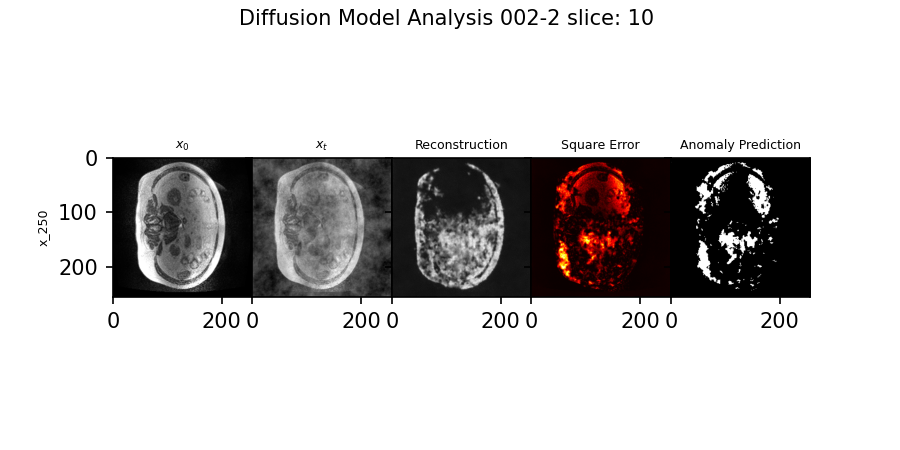